In [57]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import math

In [71]:
data = pd.read_csv('microsoft_cleaned_data.csv', index_col='Date', parse_dates=["Date"])

data = data.drop(["year", "month", "day"], axis=1)

data.shape

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.474922,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.482502,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.338396,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.095678,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.254963,51197400
...,...,...,...,...,...,...
2023-11-16,370.959991,376.350006,370.179993,376.170013,376.170013,27182300
2023-11-17,373.609985,374.369995,367.000000,369.850006,369.850006,40157000
2023-11-20,371.220001,378.869995,371.000000,377.440002,377.440002,52465100


In [72]:
train = data[:'2020'].iloc[:,1:2].values
test = data['2021':].iloc[:,1:2].values

print(train.shape)
print(test.shape)

(2769, 1)
(728, 1)


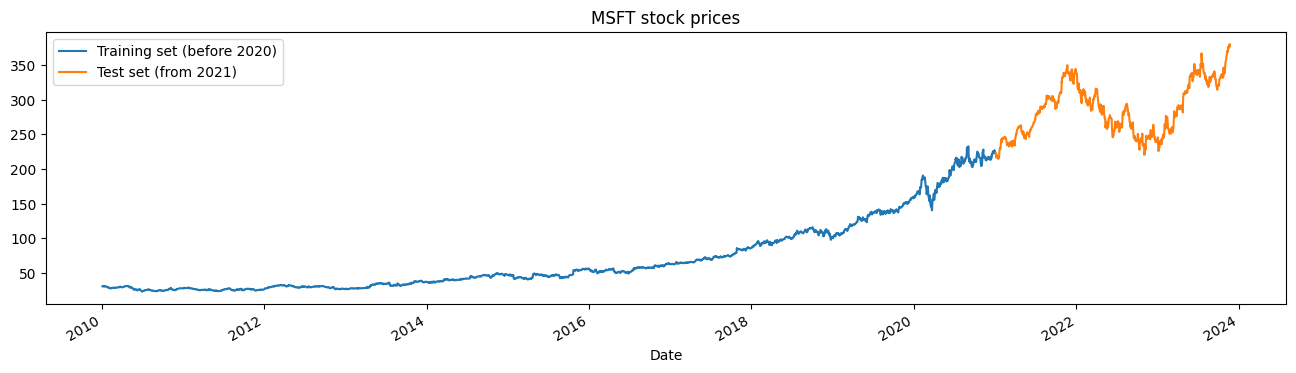

In [73]:
# visualization of "High" attribute of the dataset

data["High"][:'2020'].plot(figsize=(16,4), legend=True)
data["High"]["2021":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2020)", "Test set (from 2021)"])
plt.title("MSFT stock prices")
plt.show()

In [74]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [75]:
x_train = []
y_train = []

for i in range(60,2769):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
x_train[0]

array([0.03712895, 0.03712895, 0.0370335 , 0.03522001, 0.03607903,
       0.03550635, 0.0337883 , 0.03436098, 0.03712895, 0.03779708,
       0.03779708, 0.03636538, 0.03531545, 0.03283383, 0.03025675,
       0.0311635 , 0.03102033, 0.03125895, 0.03149757, 0.02462537,
       0.02472082, 0.02610481, 0.02472082, 0.0236709 , 0.02271643,
       0.02395724, 0.02348   , 0.02424358, 0.02262097, 0.02410042,
       0.02543667, 0.02725017, 0.02672521, 0.02682066, 0.0262957 ,
       0.02610481, 0.02543667, 0.02639114, 0.02734561, 0.0285387 ,
       0.02524578, 0.02543667, 0.02557984, 0.02677293, 0.02763196,
       0.02763196, 0.02801375, 0.02892049, 0.02887277, 0.02944545,
       0.03125895, 0.03054309, 0.03140212, 0.03044765, 0.03140212,
       0.0311635 , 0.0345996 , 0.03283383, 0.03102033, 0.03121123])

In [77]:
y_train[0]

0.03054308947913005

In [78]:
len(x_train)

2709

In [79]:
len(y_train)

2709

In [80]:
x_train.shape

(2709, 60)

In [81]:
y_train.shape

(2709,)

In [82]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2709, 60, 1)

In [17]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - loss: 0.0019
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - loss: 0.0023
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0018
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0018
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0023
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0020
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0020
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0018
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0020
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0018
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0016
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0019
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0018
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0017
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - lo

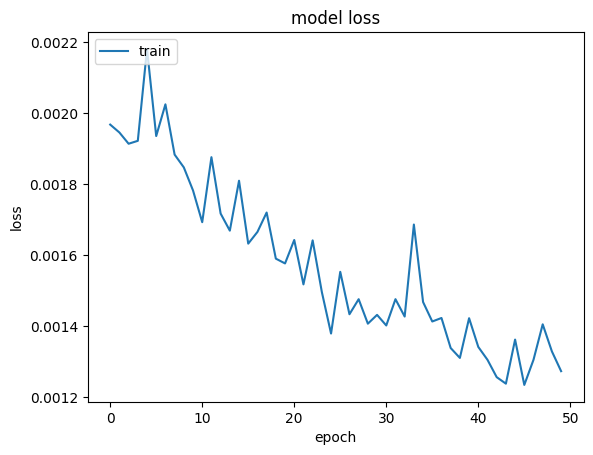

In [83]:
# compiling the model

regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train, y_train, epochs=50, batch_size=150)

#plot the loss graph
plt.plot(regressorGRU.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

(3497,)
(788,)
(788, 1)
(788, 1)
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


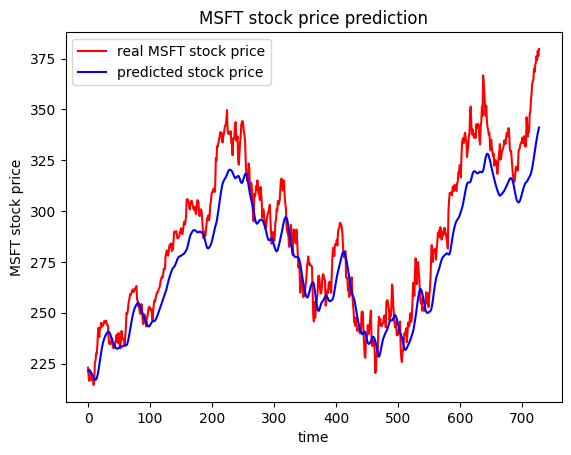

In [84]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so first 60 entries of test set have 60 previous values which is impossible to get unless we take the whole 'High' attribute data for processing

dataset_total = pd.concat((data['High'][:'2020'], data['High']['2021':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

x_test = []

for i in range(60,788):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predicting the stock prices for test set and visualization

predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)

def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real MSFT stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("MSFT stock price prediction")
    plt.xlabel("time")
    plt.ylabel("MSFT stock price")
    plt.legend()
    plt.show()

plot_predictions(test, predicted_with_gru)



                Actual   Predicted
Date                              
2021-01-04  223.000000  221.418442
2021-01-05  218.520004  221.810410
2021-01-06  216.490005  221.875931
2021-01-07  219.339996  221.568176
2021-01-08  220.580002  221.035095
                Actual   Predicted
Date                              
2023-11-16  376.350006  334.888153
2023-11-17  374.369995  336.659271
2023-11-20  378.869995  338.277374
2023-11-21  376.220001  339.783661
2023-11-22  379.790009  341.126068


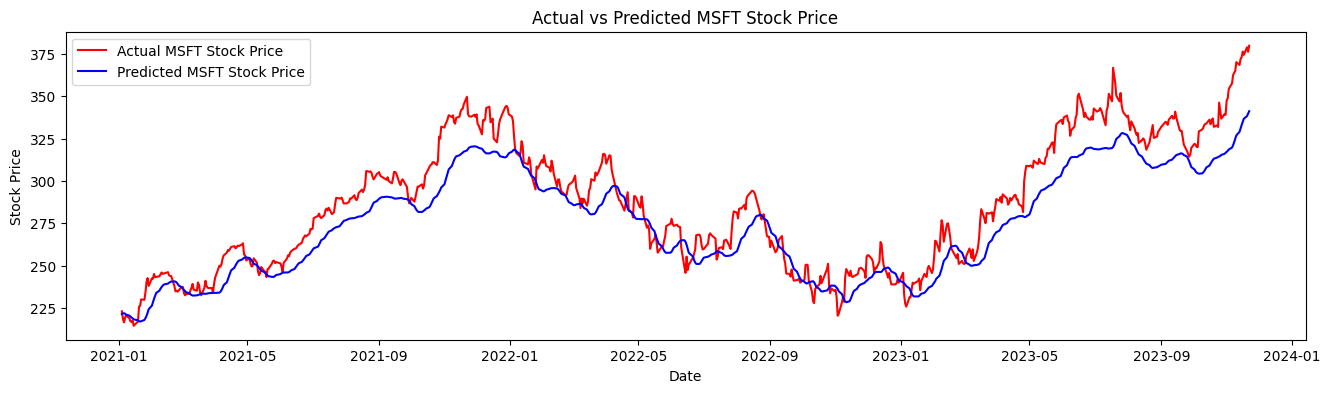

In [85]:
# Create a DataFrame to store the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': test[:len(predicted_with_gru)].flatten(),
    'Predicted': predicted_with_gru.flatten()
}, index=data['2021':].index[:len(predicted_with_gru)])

# Display the DataFrame in table format
print (comparison_df.head())
print (comparison_df.tail())

# Plot the actual vs predicted values
plt.figure(figsize=(16, 4))
plt.plot(comparison_df['Actual'], label='Actual MSFT Stock Price', color='red')
plt.plot(comparison_df['Predicted'], label='Predicted MSFT Stock Price', color='blue')
plt.title('Actual vs Predicted MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



In [86]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test[:len(predicted_with_gru)], predicted_with_gru)
mse = mean_squared_error(test[:len(predicted_with_gru)], predicted_with_gru)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 13.143792793367156
Mean Squared Error (MSE): 255.51208807325764
Root Mean Squared Error (RMSE): 15.984745480402797


In [4]:
# function which calculates root mean squared error

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [87]:
return_rmse(test[:len(predicted_with_gru)], predicted_with_gru)

the root mean squared error is : 15.984745480402797.


In [91]:
regressorGRU.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━

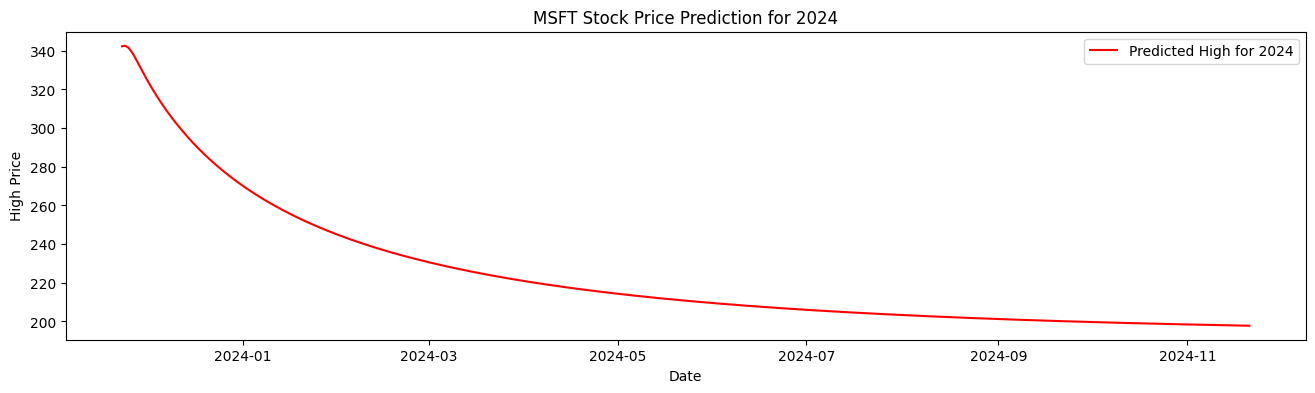

            Predicted High
2023-11-23      342.340302
2023-11-24      342.623932
2023-11-25      341.709381
2023-11-26      339.778870
2023-11-27      337.179016
...                    ...
2024-11-17      197.938934
2024-11-18      197.907684
2024-11-19      197.876694
2024-11-20      197.845886
2024-11-21      197.815353

[365 rows x 1 columns]


In [89]:
# Number of days to predict
days_to_predict = 365

# Create a list to store the predicted values
future_predictions = []

# Use the last 60 days from the test set as the initial input
last_60_days = inputs[-60:]

for _ in range(days_to_predict):
    # Reshape the input to match the model's expected input shape
    input_data = last_60_days.reshape(1, -1, 1)
    
    # Predict the next value
    predicted_value = regressorGRU.predict(input_data)
    
    # Append the predicted value to the future_predictions list
    future_predictions.append(predicted_value[0, 0])
    
    # Update the last_60_days array to include the new predicted value
    last_60_days = np.append(last_60_days[1:], predicted_value)

# Transform the predicted values back to the original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = sc.inverse_transform(future_predictions)

# Create a date range for the future predictions
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=days_to_predict + 1, inclusive='right')

# Create a DataFrame to store the future predictions
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted High'])

# Plot the future predictions
plt.figure(figsize=(16, 4))
# plt.plot(data['High'], label='Historical High')
plt.plot(future_df, label='Predicted High for 2024', color='red')
plt.title('MSFT Stock Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.show()

# Display the future predictions in table format
print(future_df.head(365))